In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt

#### Lectura archivo 

In [2]:
tips = pd.read_csv('tips.csv', sep=',', quotechar='"')

In [3]:
tips.head(8)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4

In [4]:
x = tips['tip'].value_counts().to_frame()

In [5]:
total = x['tip'].sum()

#### Obtener frecuencia relativa

In [6]:
def freq_relative(x):
    return x/total

In [7]:
freq_relative(x['tip'])

2.00    0.135246
3.00    0.094262
4.00    0.049180
5.00    0.040984
2.50    0.040984
          ...   
2.83    0.004098
1.58    0.004098
3.71    0.004098
3.35    0.004098
2.18    0.004098
Name: tip, Length: 123, dtype: float64

In [8]:
x = x.assign(freq_relative=freq_relative(x['tip']))

In [47]:
x.head(7)

tip  freq_relative
2.0   33       0.135246
3.0   23       0.094262
4.0   12       0.049180
5.0   10       0.040984
2.5   10       0.040984
3.5    9       0.036885
1.5    9       0.036885

In [10]:
x.describe()

tip  freq_relative
count  123.000000     123.000000
mean     1.983740       0.008130
std      3.875065       0.015881
min      1.000000       0.004098
25%      1.000000       0.004098
50%      1.000000       0.004098
75%      1.000000       0.004098
max     33.000000       0.135246

### Genero 
- Obtenemos el numero de hombre y mujeres existentes

In [11]:
gender = tips['sex'].value_counts().to_frame()

In [12]:
gender

sex
Male    157
Female   87

In [13]:
gender.describe()

sex
count    2.000000
mean   122.000000
std     49.497475
min     87.000000
25%    104.500000
50%    122.000000
75%    139.500000
max    157.000000

#### Correlación por Pandas
- Pearson
- Kendall
- Spearman

In [14]:
tips.corr('pearson')

total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000

In [15]:
tips.corr('kendall')

total_bill       tip      size
total_bill    1.000000  0.517181  0.484342
tip           0.517181  1.000000  0.378185
size          0.484342  0.378185  1.000000

In [16]:
tips.corr('spearman')

total_bill       tip      size
total_bill    1.000000  0.678968  0.604791
tip           0.678968  1.000000  0.468268
size          0.604791  0.468268  1.000000

#### Grafica sex 

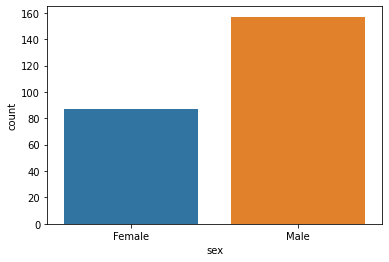

In [17]:
a = sns.countplot(x='sex', data=tips)
plt.savefig('1-sex.png')

#### Grafica sex and tip

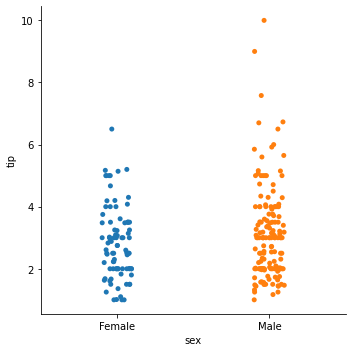

In [18]:
sns.catplot(x="sex", y="tip", data=tips)
plt.savefig('2-sex-tip.png')

#### Grafica de total_bill and sex

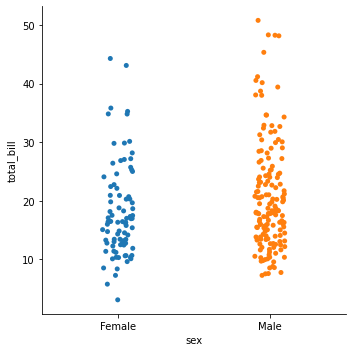

In [19]:
s = sns.catplot(x="sex", y="total_bill", data=tips)
plt.savefig('3-sex-total_bill.png')

#### Relacion total_bill and tip

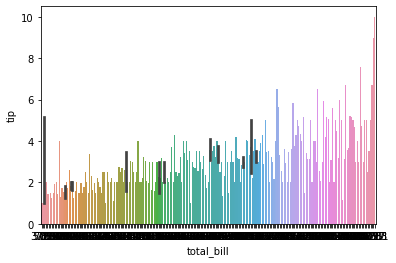

In [20]:
g = sns.barplot(x='total_bill', y='tip', data=tips)
plt.savefig('4-total_bill-tip.png')

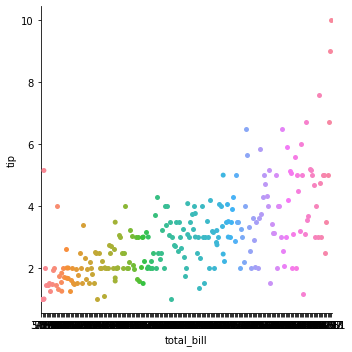

In [21]:
b = sns.catplot(x="total_bill", y="tip", data=tips)
plt.savefig('5-total_bill-tip.png')

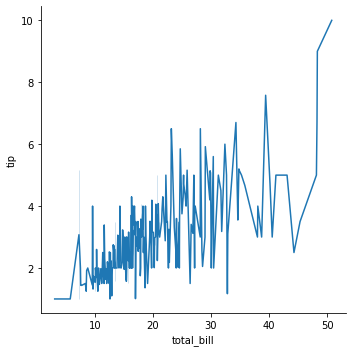

In [22]:
ym = sns.relplot(x="total_bill", y="tip", kind="line", data=tips)
plt.savefig('6-total_bill-tip.png')

#### Grafica de dispersion de total_bill and tip

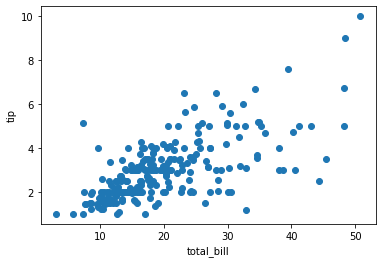

<Figure size 432x288 with 0 Axes>

In [23]:
plt.scatter(tips['total_bill'], tips['tip'])
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.show()
plt.savefig('7-total_bill-tip.png')

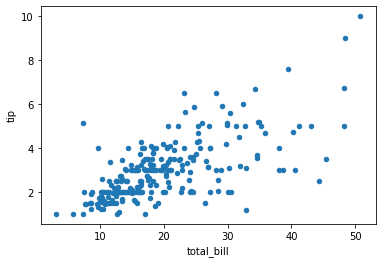

In [24]:
disp = tips.plot(kind='scatter', x='total_bill', y='tip')
plt.savefig('8-total_bill-tip.png')

####  Dispersion 

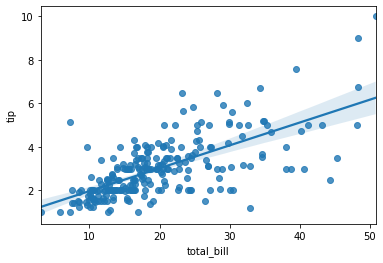

In [25]:
ns = sns.regplot(x="total_bill", y="tip", data=tips)
plt.savefig('9-total_bill-tip.png')

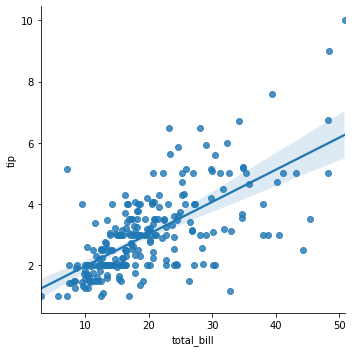

In [26]:
sns.lmplot(x="total_bill", y="tip", data=tips);
plt.savefig('10-total_bill-tip.png')

#### Relación tip-sex

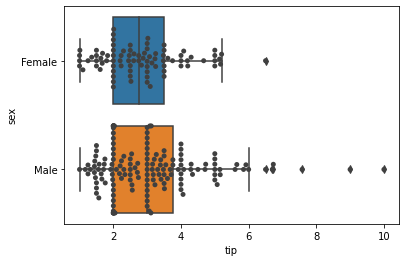

In [27]:
ax = sns.boxplot(x='tip', y='sex', data=tips)
ax = sns.swarmplot(x='tip', y='sex', data=tips, color='.25')
plt.savefig('11-tip-sex.png')

#### Relación total_bill-sex 

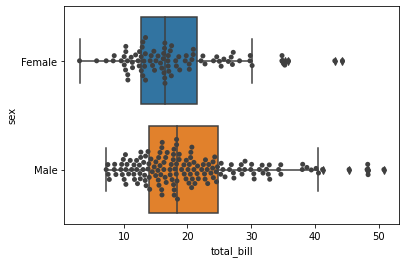

In [28]:
ax = sns.boxplot(x='total_bill', y='sex', data=tips)
ax = sns.swarmplot(x='total_bill', y='sex', data=tips, color='.25')
plt.savefig('12-total_bill-sex.png')

#### Relación
- Grafica entre total_bill and tip and sex

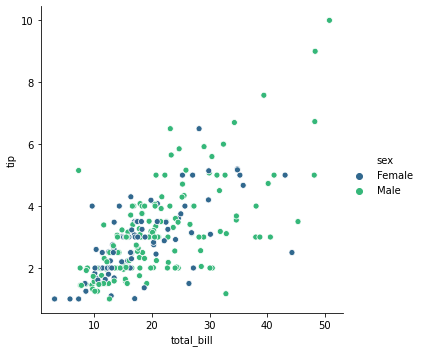

In [29]:
v = sns.relplot(x="total_bill", y="tip", hue="sex", palette='viridis', data=tips)
plt.savefig('13-total_bill-tip-sex.png')

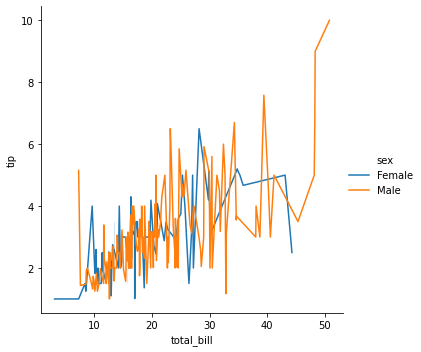

In [30]:
xm = sns.relplot(x="total_bill", y="tip", hue="sex", kind="line", data=tips)
plt.savefig('14-total_bill-tip-sex.png')

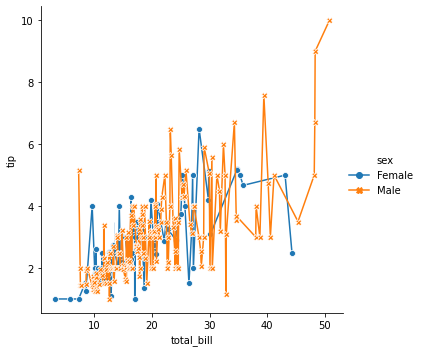

In [31]:
zv = sns.relplot(x="total_bill", y="tip", hue="sex", style="sex", dashes=False, markers=True, kind="line", data=tips)
plt.savefig('15-total_bill-tip-sex.png')

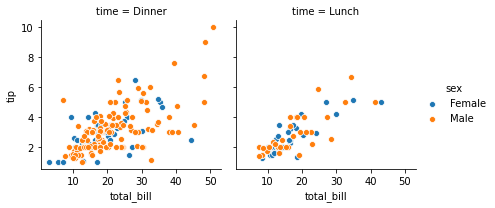

In [32]:
fg = sns.FacetGrid(tips, col="time", hue="sex")
fg = fg.map(sns.scatterplot,"total_bill","tip")
fg.add_legend()
plt.savefig('16-total_bill-tip-sex.png')

#### Metodo correlación pearson

In [33]:
def corr_pearson(data):
    n = data['X'].count()
    sum_x = data['X'].sum()
    sum_y = data['Y'].sum()
    sum_xy = data['XY'].sum()
    sum_x2 = data['X2'].sum()
    sum_y2 = data['Y2'].sum()
    mx = sum_x/n
    my = sum_y/n
    mxy = sum_xy/n
    d_x = np.sqrt((sum_x2/n)-np.square(mx))
    d_y = np.sqrt((sum_y2/n)-np.square(my))
    d_xy = (sum_xy/n)-(mx*my)
    r_xy = (d_xy/(d_x*d_y))
    return r_xy

#### DataFrame 
- Total bill
- Tip

In [34]:
data_a = pd.DataFrame({'X':tips['total_bill'],'Y': tips['tip'], 'XY': tips['total_bill'] * tips['tip'], 'X2': np.square(tips['total_bill']),'Y2': np.square(tips['tip'])})

In [48]:
data_a.head(8)

X     Y        XY        X2       Y2
0  16.99  1.01   17.1599  288.6601   1.0201
1  10.34  1.66   17.1644  106.9156   2.7556
2  21.01  3.50   73.5350  441.4201  12.2500
3  23.68  3.31   78.3808  560.7424  10.9561
4  24.59  3.61   88.7699  604.6681  13.0321
5  25.29  4.71  119.1159  639.5841  22.1841
6   8.77  2.00   17.5400   76.9129   4.0000
7  26.88  3.12   83.8656  722.5344   9.7344

#### Método asigna:
- Male 1
- Female 2

In [36]:
def sex(data):
    aux = []
    for i in data['sex']:
        if i == 'Male':
            aux.append(1)
        else:
            aux.append(2)
    return aux

#### DataFrame  
- Tip
- Sex

In [37]:
data_b = pd.DataFrame({'X':tips['tip'],'Y': sex(tips), 'XY': tips['tip'] * sex(tips), 'X2': np.square(tips['tip']),'Y2': np.square(sex(tips))})

In [50]:
data_b.head(8)

X  Y    XY       X2  Y2
0  1.01  2  2.02   1.0201   4
1  1.66  1  1.66   2.7556   1
2  3.50  1  3.50  12.2500   1
3  3.31  1  3.31  10.9561   1
4  3.61  2  7.22  13.0321   4
5  4.71  1  4.71  22.1841   1
6  2.00  1  2.00   4.0000   1
7  3.12  1  3.12   9.7344   1

#### Correlación

In [39]:
a = corr_pearson(data_a)

In [40]:
b = corr_pearson(data_b)

#### Diagrama de dispersion 
- Total bill
- Tip
- Sex

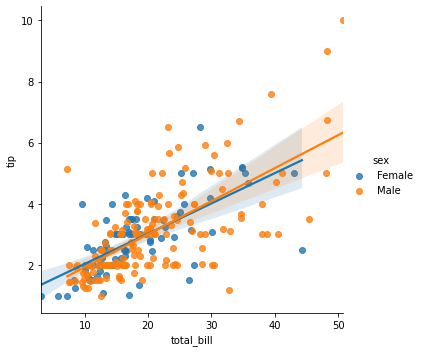

In [41]:
ng = sns.lmplot(x="total_bill", y="tip", hue="sex", data=tips)
plt.savefig('17-total_bill-tip-sex.png')